In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
#This code will set the default figure size to 12 inches in width and 8 inches in height for all subsequent plots created with Matplotlib.
plt.rcParams['figure.figsize'] = (12, 8)

import seaborn as sns


In [49]:
# Reading the dataset

df = pd.read_csv('movies.csv')

# lets look the first 10 rows of the data

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
# Checking the number of rows and columns in the data

df.shape  # there are 7668 rows and 15 columns in the dataset

(7668, 15)

In [5]:
# Use df.describe() to get summary statistics of number columns
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
# Use df.describe(include='all') to get summary statistics for all columns
df.describe(include='all')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,7668,7591,7668,7668.000000,7666,7665.000000,7.665000e+03,7668,7665,7667,7665,5.497000e+03,7.479000e+03,7651,7664.000000
unique,7512,12,19,NaN,3414,NaN,NaN,2949,4535,2814,59,NaN,NaN,2385,NaN
top,Nobody's Fool,R,Comedy,NaN,"February 14, 1986 (United States)",NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,3,3697,2245,NaN,9,NaN,NaN,38,37,43,5475,NaN,NaN,377,NaN
mean,NaN,NaN,NaN,2000.405451,NaN,6.390411,8.810850e+04,NaN,NaN,NaN,NaN,3.558988e+07,7.850054e+07,NaN,107.261613
std,NaN,NaN,NaN,11.153508,NaN,0.968842,1.633238e+05,NaN,NaN,NaN,NaN,4.145730e+07,1.657251e+08,NaN,18.581247
min,NaN,NaN,NaN,1980.000000,NaN,1.900000,7.000000e+00,NaN,NaN,NaN,NaN,3.000000e+03,3.090000e+02,NaN,55.000000
25%,NaN,NaN,NaN,1991.000000,NaN,5.800000,9.100000e+03,NaN,NaN,NaN,NaN,1.000000e+07,4.532056e+06,NaN,95.000000
50%,NaN,NaN,NaN,2000.000000,NaN,6.500000,3.300000e+04,NaN,NaN,NaN,NaN,2.050000e+07,2.020576e+07,NaN,104.000000
75%,NaN,NaN,NaN,2010.000000,NaN,7.100000,9.300000e+04,NaN,NaN,NaN,NaN,4.500000e+07,7.601669e+07,NaN,116.000000


In [7]:
# Use df.isna().sum() to count missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# Iterate over columns and calculate the percentage of missing and present data

for col in df.columns:
    missing_percent = np.mean(df[col].isna()) * 100
    present_percent = 100 - missing_percent
    print('{} - Missing: {:.2f}%, Present: {:.2f}%'.format(col, missing_percent, present_percent))


name - Missing: 0.00%, Present: 100.00%
rating - Missing: 1.00%, Present: 99.00%
genre - Missing: 0.00%, Present: 100.00%
year - Missing: 0.00%, Present: 100.00%
released - Missing: 0.03%, Present: 99.97%
score - Missing: 0.04%, Present: 99.96%
votes - Missing: 0.04%, Present: 99.96%
director - Missing: 0.00%, Present: 100.00%
writer - Missing: 0.04%, Present: 99.96%
star - Missing: 0.01%, Present: 99.99%
country - Missing: 0.04%, Present: 99.96%
budget - Missing: 28.31%, Present: 71.69%
gross - Missing: 2.46%, Present: 97.54%
company - Missing: 0.22%, Present: 99.78%
runtime - Missing: 0.05%, Present: 99.95%


In [9]:
# Iterate over columns and calculate the percentage of missing and present data

for col in df.columns:
    missing_percent = np.mean(df[col].isna()) * 100
    present_percent = 100 - missing_percent
    print('{} - Missing: {:.2f}%, Present: {:.2f}%'.format(col, missing_percent, present_percent))


name - Missing: 0.00%, Present: 100.00%
rating - Missing: 1.00%, Present: 99.00%
genre - Missing: 0.00%, Present: 100.00%
year - Missing: 0.00%, Present: 100.00%
released - Missing: 0.03%, Present: 99.97%
score - Missing: 0.04%, Present: 99.96%
votes - Missing: 0.04%, Present: 99.96%
director - Missing: 0.00%, Present: 100.00%
writer - Missing: 0.04%, Present: 99.96%
star - Missing: 0.01%, Present: 99.99%
country - Missing: 0.04%, Present: 99.96%
budget - Missing: 28.31%, Present: 71.69%
gross - Missing: 2.46%, Present: 97.54%
company - Missing: 0.22%, Present: 99.78%
runtime - Missing: 0.05%, Present: 99.95%


In [10]:
# Use df.dtypes to display data types of each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [50]:
# Replace NaN values in the 'budget' column with 0
df['budget'].fillna(0, inplace=True)

# Convert the 'budget' column to int64 data type
df['budget'] = df['budget'].astype('int64')

In [51]:
# Replace NaN values in the 'gross' column with 0
df['gross'] = df['gross'].replace(np.nan, 0)

# Convert the 'gross' column to int64 data typ
df['gross'] = df['gross'].astype('int64')

In [52]:
# checking our dataframe
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [53]:
# Convert the 'date' column to a string and then extract the year (4 characters)
df['released'] = df['released'].astype(str)

df['released_year'] = df['released'].str.extract(r'(\d{4})')


In [54]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [55]:
# Now we will create a month column.
# Extract everything before the first space in the 'released' column and store it in a new 'month' column
df['month'] = df['released'].str.split(' ').str[0]


In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July


In [57]:
# Sort a Pandas DataFrame by the 'gross' column in descending order
df = df.sort_values(by = 'gross', inplace = False, ascending = False)

In [58]:
# display more rows of the data we can use this:
#pd.set_option('display.max.rows'None) # this is used to display the all of the rows in the data 
pd.reset_option('display.max_rows')   # this sets the rows display as the default 

In [59]:
# check if there are duplicates in the dataframe

# Check for duplicate rows
duplicate_rows = df.duplicated()

# Check if any duplicates exist
if duplicate_rows.any():
    print("Duplicate rows exist in the DataFrame.")
else:
    print("No duplicate rows in the DataFrame.")

No duplicate rows in the DataFrame.


In [21]:
# if there are duplicate rows in the dataframe you can drop it by using:
df.drop_duplicates()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020,October
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020,February
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020,April
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020,October


In [102]:
# the top 10 highiest gross companies

top10_companies = df.groupby('company').sum('gross').sort_values(by = 'gross', ascending = False)
top10_companies.head(10)

,year,score,votes,budget,gross,runtime
company,,,,,,
Warner Bros.,668240,2149.2,64133043.0,19568300000,56491421806,38081.0
Universal Pictures,753986,2410.9,51082093.0,15989730001,52514188890,41406.0
Columbia Pictures,664096,2100.1,41116704.0,15512107000,43008941346,36519.0
Paramount Pictures,639424,2027.5,42389829.0,13723450000,40493607415,34299.0
Twentieth Century Fox,480111,1499.9,36701007.0,11474600000,40257053857,25935.0
Walt Disney Pictures,246463,796.6,20200500.0,10404700000,36327887792,12846.0
New Line Cinema,348368,1076.8,22491700.0,5648200000,19883797684,18494.0
Marvel Studios,24189,91.2,9286000.0,2664000000,15065592411,1627.0
DreamWorks Animation,56281,193.1,5549000.0,3344000000,11873612858,2603.0


Text(0.5, 1.0, 'budget bins')

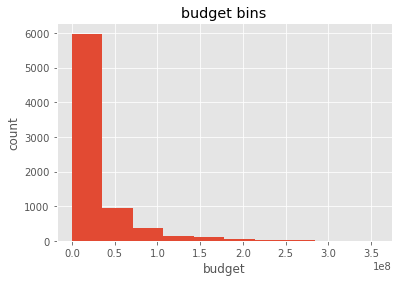

In [104]:
# let's check the distribution of budget across all movie industries

import matplotlib as plt
%matplotlib inline
from matplotlib import pyplot
plt.pyplot.hist(df['budget'])
plt.pyplot.xlabel('budget')
plt.pyplot.ylabel('count')
plt.pyplot.title('budget bins')

In [107]:
# let create a new variable that categorize budget into (High, Mediuim  and Low)

import numpy as np

bins = np.linspace(min(df['budget']), max(df['budget']), 4)
print(bins)

group_names = ['Low','Medium', 'High']

df['budget-binned'] = pd.cut(df['budget'], bins, labels = group_names, include_lowest = True)

df[['budget','budget-binned']].head(5).sort_values(by = 'budget', ascending = False)

[0.00000000e+00 1.18666667e+08 2.37333333e+08 3.56000000e+08]


,budget,budget-binned
7445,356000000,High
7244,321000000,High
6663,245000000,High
5445,237000000,Medium
3045,200000000,Medium


In [108]:
# see the number of values in each category

df['budget-binned'].value_counts()

Low       7352
Medium     294
High        22
Name: budget-binned, dtype: int64

Text(0.5, 1.0, 'budget bins')

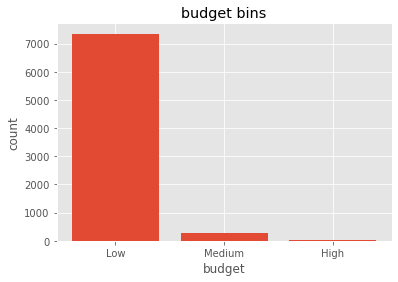

In [109]:
# let's visualize and see the distribution of budget in the three categories

pyplot.bar(group_names, df["budget-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("budget")
plt.pyplot.ylabel("count")
plt.pyplot.title("budget bins")

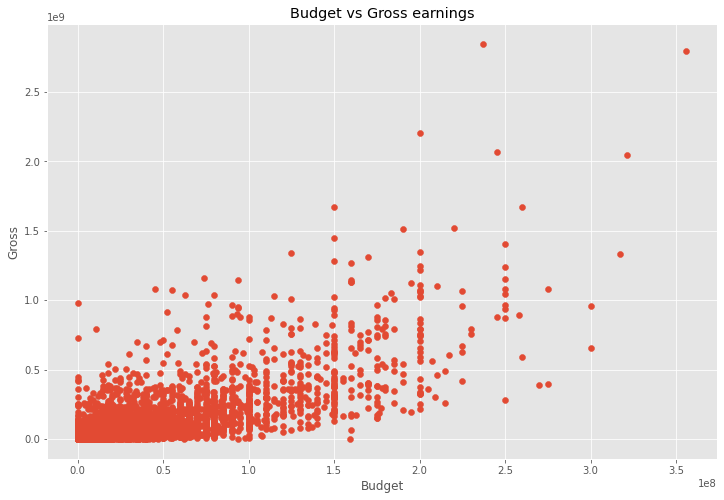

In [22]:
# this time we are checking the correlation of our data

# Create a scatter plot using the 'budget' column as the x-axis and the 'gross' column as the y-axis

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

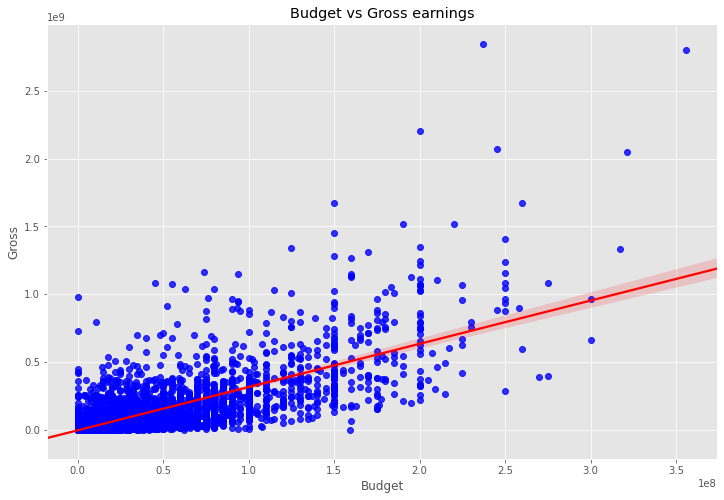

In [38]:
# Create a regplot using the 'budget' column as the x-axis and the 'gross' column as the y-axis
# this good for checking the fitted line in your regression plot
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'blue'}, line_kws = {'color':'red'})

plt.title('Budget vs Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [35]:
# Calculate the correlation between columns in a DataFrame
df.corr()['gross'].sort_values(ascending = False)
df[['budget','gross']].corr()
# It show a high correlation between budget and gross

,budget,gross
budget,1.000000,0.750157
gross,0.750157,1.000000


In [33]:
# trying different types of correlation

df.corr(method = 'pearson')['gross'].sort_values(ascending = False)
#df.corr(method = 'kendall')['gross'].sort_values(ascending = False)
#df.corr(method = 'spearman')['gross'].sort_values(ascending = False)

gross      1.000000
budget     0.750157
votes      0.632834
year       0.261900
runtime    0.245235
score      0.186392
Name: gross, dtype: float64

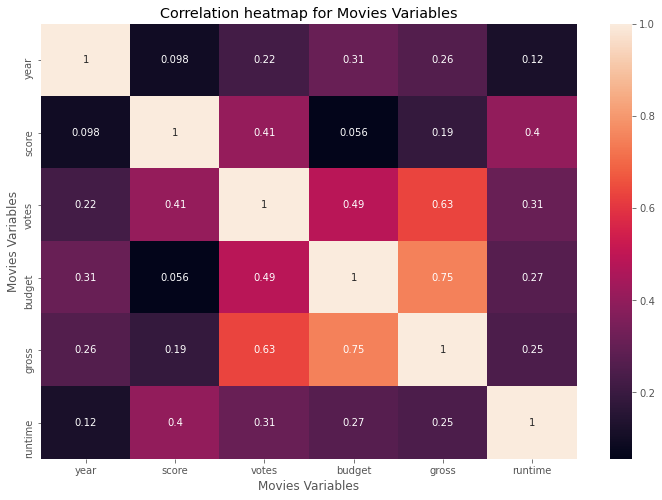

In [42]:
# creating correlation matrix heaatmap

sns.heatmap(df.corr(method = 'pearson'), annot = True)

plt.title('Correlation heatmap for Movies Variables')
plt.xlabel('Movies Variables')
plt.ylabel('Movies Variables')
plt.show()

In [46]:

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [47]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,month
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274.0,117,82,2797,55,0,0,1159,92.0,10,12
1614,1745,6,10,1989,55,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,9,8
1606,2691,6,8,1989,257,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0,9,8
1601,3836,-1,4,1989,1160,7.1,1500.0,1105,1696,681,18,0,0,504,104.0,10,12


In [91]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,month
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,December
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,April
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,December
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,December
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,April


In [90]:
# let calculate correlation that every variable has compared to the rest, by unstacking it.
df_corr = df_numerized.corr()
df_corr_unstack = df_corr.unstack()
df_corr_unstack.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.010480
dtype: float64

In [89]:
# get the variable with the highiest correlation, let's say (>0.5)
sorted_var = df_corr_unstack.sort_values()
sorted_var[(sorted_var) > 0.5]

votes          gross            0.632834
gross          votes            0.632834
               budget           0.750157
budget         gross            0.750157
month          released         0.995320
released       month            0.995320
year           released_year    0.996397
released_year  year             0.996397
name           name             1.000000
writer         writer           1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
released_year  released_year    1.000000
month          m